**Importing Libraries**



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/framingham.csv')

In [3]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


Each attribute is a potential risk factor. There are both demographic, behavioural and medical risk factors.

 - **<font color=SteelBlue>Demographic:<font>**
sex: male or female;(Nominal)

    -  age: age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)


 - **<font color=SteelBlue>Behavioural<font>**

    -  currentSmoker: whether or not the patient is a current smoker (Nominal)

    -  cigsPerDay: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarretts, even half a cigarette.)

 - **<font color=SteelBlue>Medical( history):<font>**

    -  BPMeds: whether or not the patient was on blood pressure medication (Nominal)

    -  prevalentStroke: whether or not the patient had previously had a stroke (Nominal)

    -  prevalentHyp: whether or not the patient was hypertensive (Nominal)

    -  diabetes: whether or not the patient had diabetes (Nominal)

 - **<font color=SteelBlue>Medical(current):<font>**

    -  totChol: total cholesterol level (Continuous)

    -  sysBP: systolic blood pressure (Continuous)

    -  diaBP: diastolic blood pressure (Continuous)

    -  BMI: Body Mass Index (Continuous)

    -  heartRate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

    -  glucose: glucose level (Continuous)


 - **<font color=SteelBlue>Predict variable (desired target):<font>**

    -  10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)


In [5]:
df.shape

(4240, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


**Data Cleaning and EDA**

In [7]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

<Axes: >

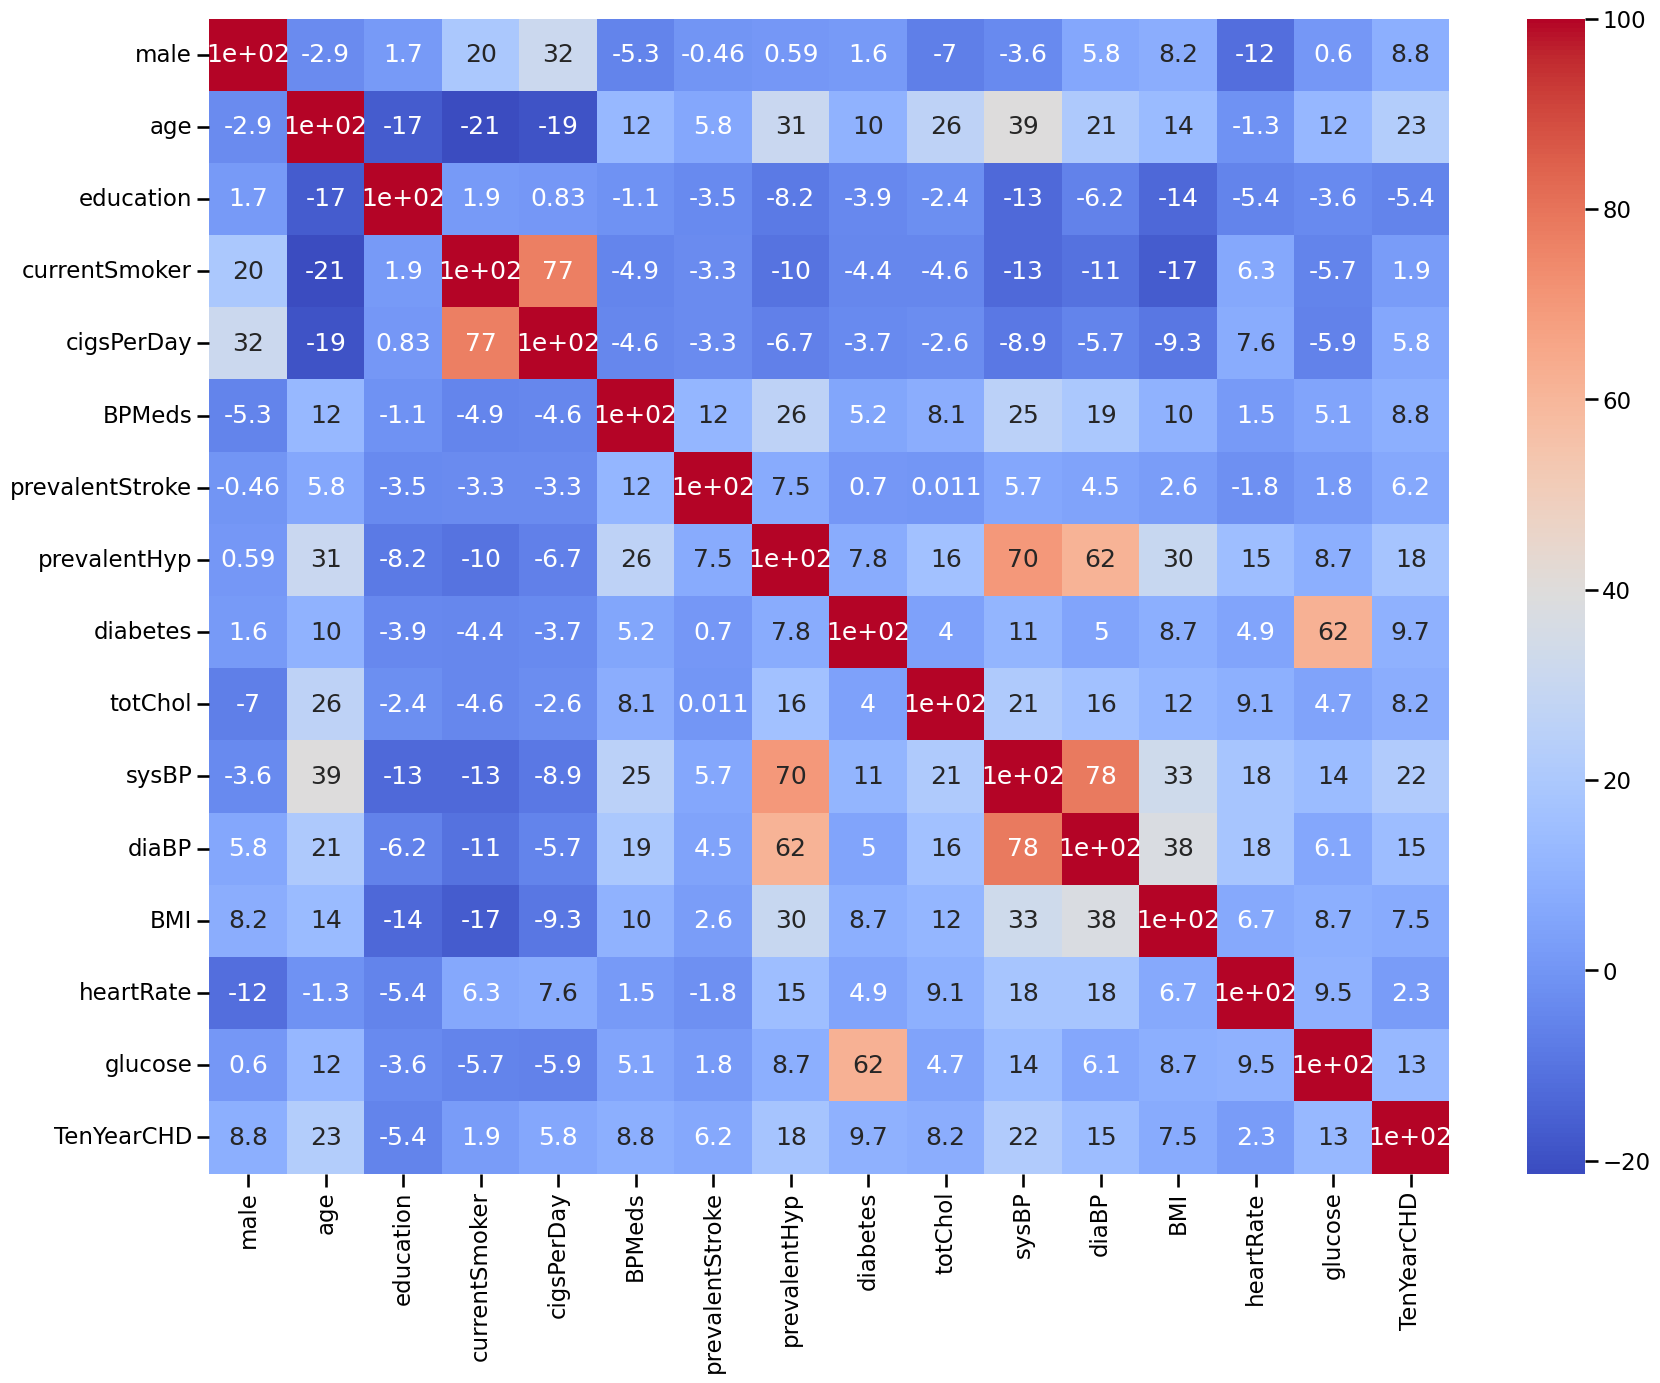

In [8]:
#Pearson Correlation

sns.set_context('talk')
plt.figure(figsize=(20,15))
sns.heatmap(df.corr()*100, annot=True, cmap='coolwarm')

**Strong Correlations**

1. currentSmoker & cigsPerDay = 77

2. sysBP & prevalentHyp = 70

3. diaBP & prevalentHyp = 62

4. sysBP & diaBP = 78

5. glucose & diabetes = 62

In [9]:
#function for missing value imputation

def impute_median(df):
  return df.fillna(df.median())

In [10]:
#median imputation

df.glucose = df['glucose'].transform(impute_median)
df.education = df['education'].transform(impute_median)
df.heartRate = df['heartRate'].transform(impute_median)
df.totChol = df['totChol'].transform(impute_median)
df.BPMeds = df['BPMeds'].transform(impute_median)

by_currentSmoker = df.groupby(['currentSmoker'])
df.cigsPerDay = by_currentSmoker['cigsPerDay'].transform(impute_median)

by_age = df.groupby(['male','age'])
df.BMI = by_age['BMI'].transform(impute_median)

In [11]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [12]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,0.429245,49.580189,1.979953,0.494104,9.081132,0.029245,0.005896,0.310613,0.025708,236.667689,132.354599,82.897759,25.798756,75.878774,81.600943,0.151887
std,0.495027,8.572942,1.007087,0.500024,11.916119,0.168513,0.076569,0.462799,0.158280,44.328480,22.033300,11.910394,4.072774,12.023937,22.860340,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.077500,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.397500,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,90.000000,28.040000,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


Text(0.5, 1.0, 'CHD by Gender')

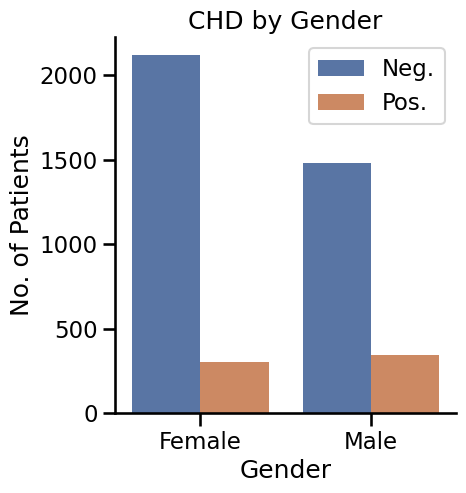

In [13]:
#TenYearCHD by Gender

sns.catplot(x ='male',hue ='TenYearCHD', data = df, kind ='count', palette ='deep', legend =False)
plt.xlabel('Gender')
plt.xticks(ticks=[0,1], labels = ['Female', 'Male'])
plt.ylabel('No. of Patients')
plt.legend(['Neg.', 'Pos.'])
plt.title('CHD by Gender')

About 80%-90% of females are falling to negative classification.

About 60%-70% of males are in the negative classification.

Overall, 80%-90% of the dataset are negative classifications and 10%-15% are positive classifications

Text(0.5, 1.0, 'Agewise distribution of the patients')

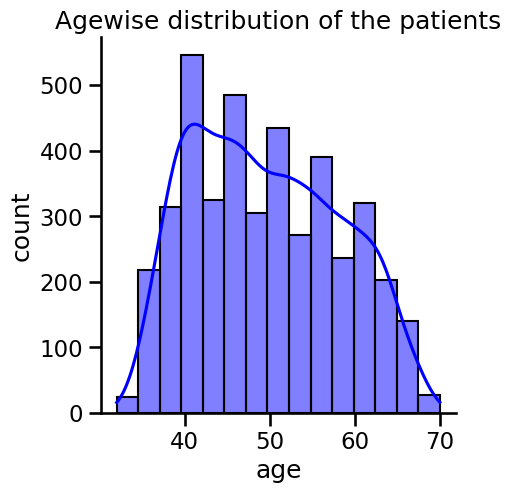

In [14]:
sns.displot(df['age'], bins =15, kde = True, color='blue')
plt.ylabel('count')
plt.title('Agewise distribution of the patients')

Majority of patients are betweeen the ages of 40-50

In [15]:
#Age encoding
def encode_age(data):
  if data <= 40:
    return 0
  if data > 40 and data <= 55:
    return 1
  else:
    return 2

def heartrate_enc(data):
  if data <= 60:
    return 0
  if data > 60 and data <= 100:
    return 1
  else:
    return 2

df['enc_hr'] = df['heartRate'].apply(heartrate_enc)
df['encode_age'] = df['age'].apply(lambda x : encode_age(x))

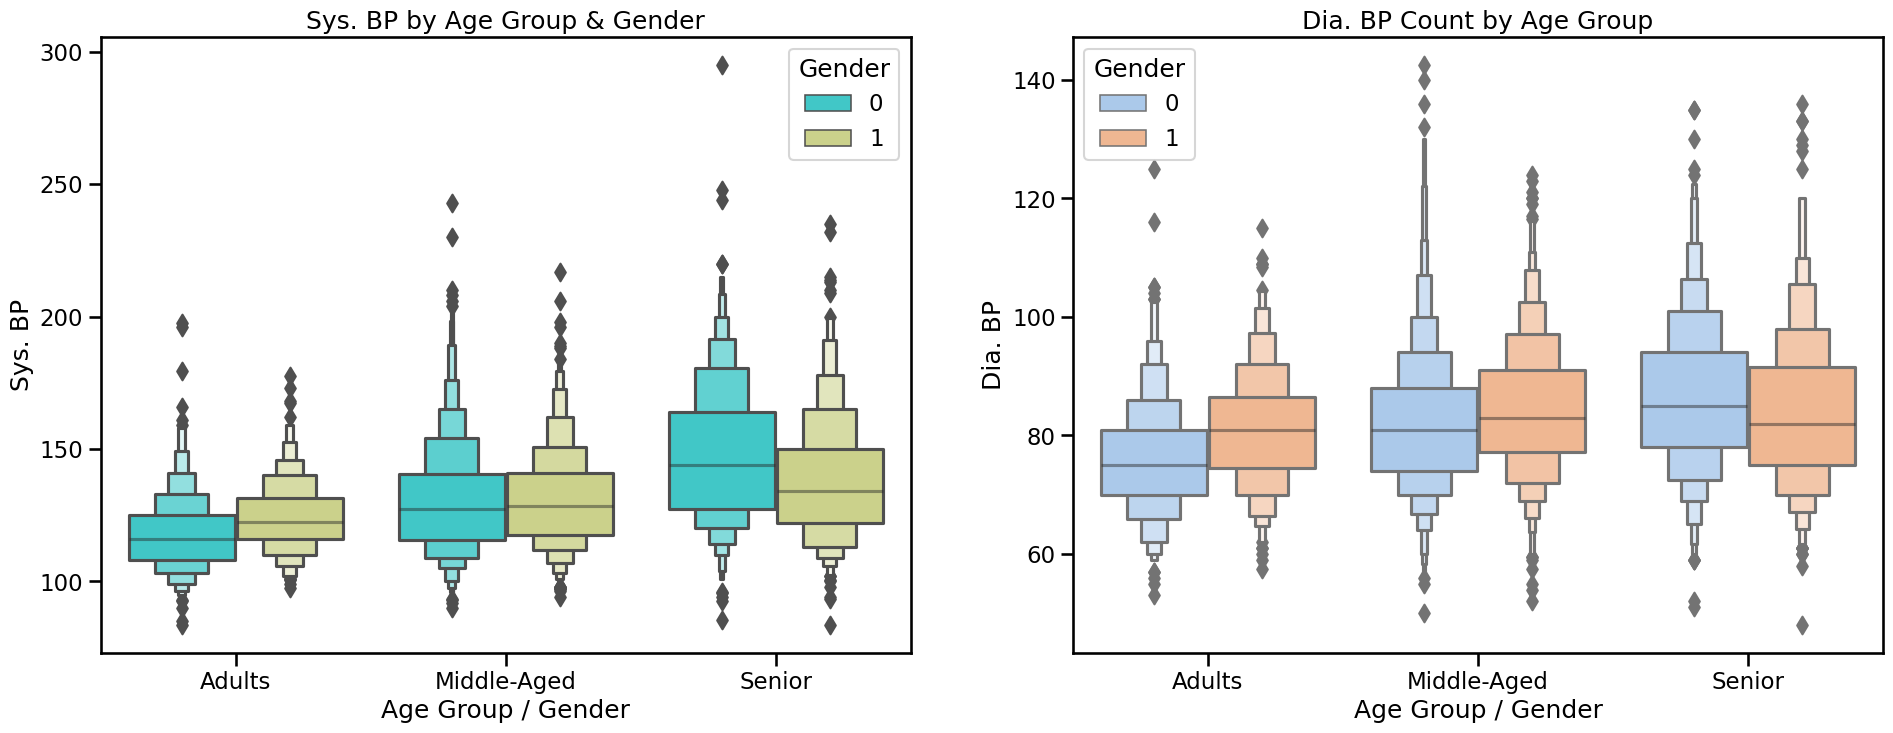

In [16]:
#Multivariate Analysis

plt.figure(figsize=(23,8))
plt.subplots_adjust(wspace=0.2, hspace=0.3)

plt.subplot(1, 2, 1)
sns.boxenplot(x='encode_age', y='sysBP', hue='male', data=df, palette='rainbow')
plt.xlabel('Age Group / Gender')
plt.ylabel('Sys. BP')
plt.xticks(ticks=[0,1,2], labels=['Adults', 'Middle-Aged', 'Senior'])
plt.title('Sys. BP by Age Group & Gender')
plt.legend(title='Gender')

plt.subplot(1, 2, 2)
sns.boxenplot(x='encode_age', y='diaBP', hue='male', data=df, palette='pastel')
plt.xlabel('Age Group / Gender')
plt.ylabel('Dia. BP')
plt.xticks(ticks=[0,1,2], labels=['Adults', 'Middle-Aged', 'Senior'])
plt.title('Dia. BP Count by Age Group')
plt.legend(title='Gender')




- Sys. BP by Age Group & Gender :Sys. BP is Increasing by Age Group and Gender.


- Dia. BP by Age Group & Gender: Similar to Sys. BP , the Dia. BP is seen Increasing by Age Group & Gender.

Text(0.5, 1.0, 'Cigs. per day by Age Group')

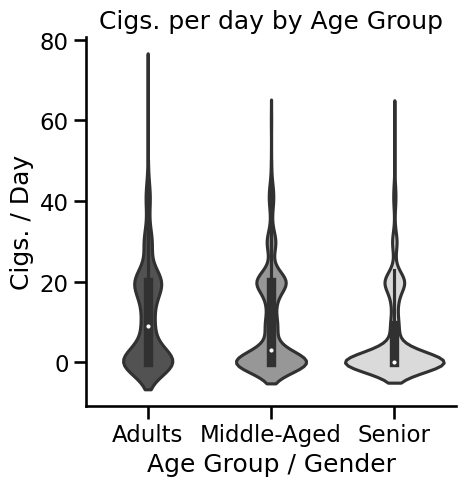

In [17]:
#Violin Plot of Cigsperday by age group

sns.catplot(data=df, x='encode_age', y='cigsPerDay', kind='violin', size=7, palette='Greys_r')
plt.xlabel('Age Group / Gender')
plt.ylabel('Cigs. / Day')
plt.xticks(ticks=[0,1,2], labels=['Adults', 'Middle-Aged', 'Senior'])
plt.title('Cigs. per day by Age Group')

Text(0.5, 1.0, 'Diabetes by Age Group')

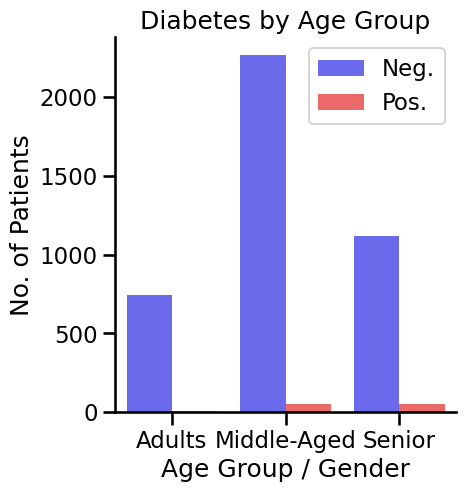

In [18]:
#Diabetes by Age Group

sns.catplot(x='encode_age', hue='diabetes', data=df, kind='count', palette='seismic', legend=False)
plt.xlabel('Age Group / Gender')
plt.xticks(ticks=[0,1,2], labels=['Adults', 'Middle-Aged', 'Senior'])
plt.ylabel('No. of Patients')
plt.legend(['Neg.', 'Pos.'])
plt.title('Diabetes by Age Group')

Text(0.5, 1.0, 'Target Class Count')

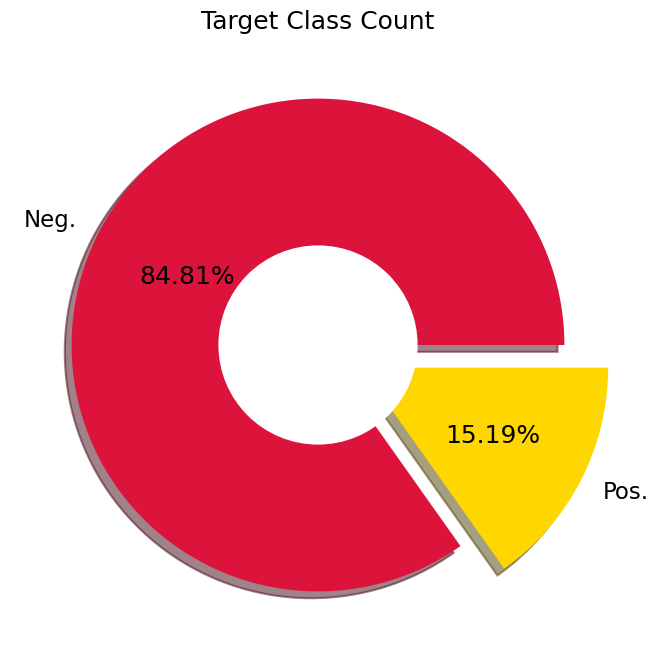

In [19]:
#Target Class count

plt.figure(figsize=(8,8))
plt.pie(df['TenYearCHD'].value_counts(), labels=['Neg.','Pos.'], autopct='%1.2f%%', explode=[0,0.2], shadow=True, colors=['crimson','gold'])
my_circle = plt.Circle( (0,0), 0.4, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Target Class Count')

Ratio of positive to negative is 85:15
making the dataset imbalanced also the positive cases is in the minor class.


In [20]:
df1 = df.drop(columns='education', axis = 1)

In [21]:
df1_copy = df1.copy()

In [22]:
df1.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,enc_hr,encode_age
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,1,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,1,1
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,1,1
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,1,2
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,1,1


**Building Model**

In [23]:
#train-test split
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score, roc_curve, auc

x = df1.drop(columns='TenYearCHD', axis = 1)
y = df1_copy['TenYearCHD']

x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=23)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3180, 16), (1060, 16), (3180,), (1060,))

3180 records for training

1060 records for testing

In [24]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(x_train, y_train)

log_pred = log_reg.predict(x_test)
log_pred

array([0, 0, 0, ..., 0, 0, 0])

Accuracy Score : 0.8594339622641509
Cross Validation Score :  0.8493710691823899
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       908
           1       0.64      0.05      0.09       152

    accuracy                           0.86      1060
   macro avg       0.75      0.52      0.50      1060
weighted avg       0.83      0.86      0.80      1060



<Axes: >

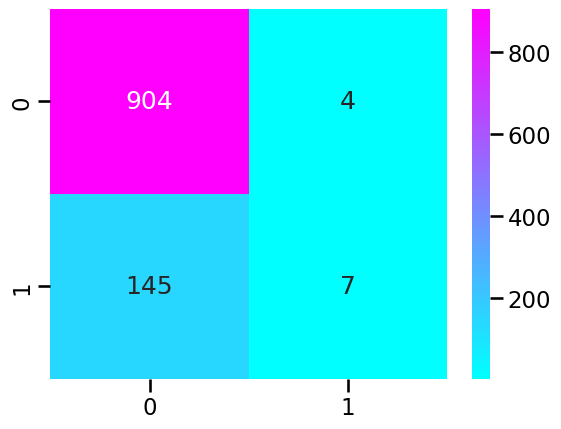

In [25]:
#Metrics Evaluation

print ('Accuracy Score :', accuracy_score(y_test, log_pred))
print ('Cross Validation Score : ', cross_val_score(log_reg, x_train, y_train, cv=5).mean())
print (classification_report(y_test, log_pred))

sns.heatmap(confusion_matrix(y_test, log_pred), annot=True, cmap='cool', fmt='d')

Accuracy Score = 0.86

From the confusion Matrix

Out of 908 Negative Diagnosis, 904 are correctly classified and 4 are misclassified

Out of 152 Positive Diagnosis, 7 are correctly classified and 145 are misclassified


In [26]:
# train a logistic regression model on the training set by adding class weight parameter
from sklearn.linear_model import LogisticRegression

log_reg_cw = LogisticRegression(solver='liblinear', class_weight='balanced')
log_reg_cw.fit(x_train, y_train)

log_cw_pred = log_reg_cw.predict(x_test)
log_cw_pred

array([1, 1, 0, ..., 0, 1, 0])

Accuracy Score : 0.6698113207547169
Cross Validation Score :  0.6622641509433962
              precision    recall  f1-score   support

           0       0.92      0.67      0.78       908
           1       0.25      0.67      0.37       152

    accuracy                           0.67      1060
   macro avg       0.59      0.67      0.57      1060
weighted avg       0.83      0.67      0.72      1060



<Axes: >

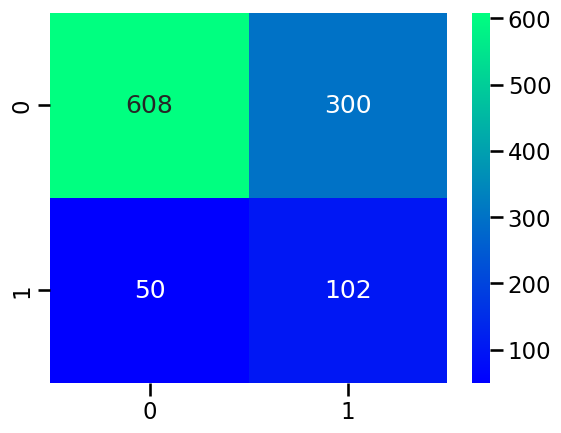

In [27]:
#Metrics Evaluation

print ('Accuracy Score :', accuracy_score(y_test, log_cw_pred))
print ('Cross Validation Score : ', cross_val_score(log_reg_cw, x_train, y_train, cv=5).mean())
print (classification_report(y_test, log_cw_pred))

sns.heatmap(confusion_matrix(y_test, log_cw_pred), annot=True, cmap='winter', fmt='d')

Accuracy Score = 0.67

From the confusion Matrix

Out of 908 Negative Diagnosis, 608 are correctly classified and 300 are misclassified

Out of 152 Positive Diagnosis, 102 are correctly classified and 50 are misclassified

Text(0.5, 1.0, 'Receiver operating characteristic - Area Under Curve (ROC-AUC)')

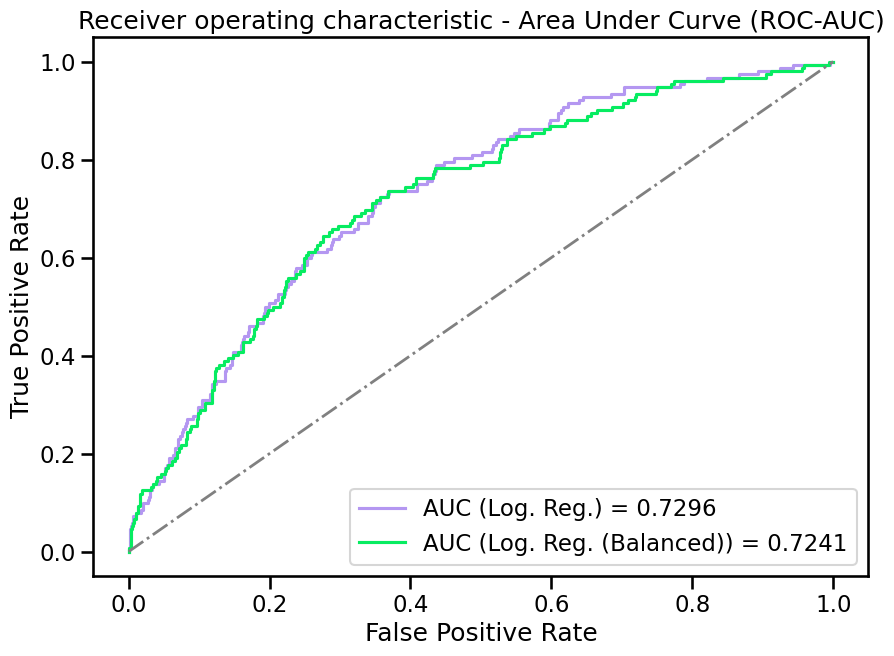

In [28]:
#Roc-Auc

from sklearn.metrics import auc, roc_auc_score, roc_curve

#log_prob = log_reg.predict_proba(x_test)
log_prob_cw = log_reg_cw.predict_proba(x_test)
log_prob_up = log_reg.predict_proba(x_test)

#fpr, tpr, _ = roc_curve(y_test, log_prob[:,1])
fpr_cw, tpr_cw, _ = roc_curve(y_test, log_prob_cw[:,1])
fpr_up, tpr_up, _ = roc_curve(y_test, log_prob_up[:,1])

#log_roc_auc = auc(fpr, tpr)
log_cw_roc_auc = auc(fpr_cw, tpr_cw)
log_up_roc_auc = auc(fpr_up, tpr_up)

plt.figure(figsize=(10,7))

#plt.plot(fpr, tpr, color=(np.random.rand(), np.random.rand(), np.random.rand()), label='AUC (Log. Reg.) = %0.4f'% log_roc_auc)
plt.plot(fpr_cw, tpr_cw, color=(np.random.rand(), np.random.rand(), np.random.rand()), label='AUC (Log. Reg.) = %0.4f'% log_cw_roc_auc)
plt.plot(fpr_up, tpr_up, color=(np.random.rand(), np.random.rand(), np.random.rand()), label='AUC (Log. Reg. (Balanced)) = %0.4f'% log_up_roc_auc)

plt.plot([0,1], 'grey', lw=2, linestyle='-.')

plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Receiver operating characteristic - Area Under Curve (ROC-AUC)')

Logistic Regression model with Class Weight as "balanced"  is giving us decent Score of 0.7241.

Logistic Regression which has given us Score of 0.7296.


**Model Demonstration**

In [29]:
#demo of the model

import random

def encode_age(data):
    if data <= 40:
        return 0
    if data > 40 and data <= 55:
        return 1
    else:
        return 2

# Generate random values for demonstration
age = random.uniform(30, 70)  # Random age between 30 and 70
gender = random.choice(['Male', 'Female'])
smoker = random.choice(['Yes', 'No'])
cigs_per_day = random.uniform(0, 40)  # Random number of cigarettes per day between 0 and 40
bp_meds = random.choice(['Yes', 'No'])
stroke = random.choice(['Yes', 'No'])
hypertensive = random.choice(['Yes', 'No'])
diabetes = random.choice(['Yes', 'No'])
chol_level = random.uniform(120, 300)  # Random cholesterol level between 120 and 300
sys_bp = random.uniform(90, 200)  # Random systolic blood pressure between 90 and 200
dia_bp = random.uniform(60, 120)  # Random diastolic blood pressure between 60 and 120
bmi = random.uniform(18, 40)  # Random BMI between 18 and 40
heart_rate = random.uniform(50, 100)  # Random heart rate between 50 and 100
glucose = random.uniform(70, 200)  # Random glucose level between 70 and 200

# Calculate 'enc_hr' based on the generated heart_rate
if heart_rate <= 60:
    enc_hr = 0
elif heart_rate > 60 and heart_rate <= 100:
    enc_hr = 1
else:
    enc_hr = 2

# Calculate 'encode_age' based on the generated age
encode_age_value = encode_age(age)

# Create a DataFrame with the generated random values
user_df = pd.DataFrame({
    'male': [1 if gender.lower() == 'male' else 0],
    'age': [age],
    'currentSmoker': [1 if smoker.lower() == 'yes' else 0],
    'cigsPerDay': [cigs_per_day],
    'BPMeds': [1 if bp_meds.lower() == 'yes' else 0],
    'prevalentStroke': [1 if stroke.lower() == 'yes' else 0],
    'prevalentHyp': [1 if hypertensive.lower() == 'yes' else 0],
    'diabetes': [1 if diabetes.lower() == 'yes' else 0],
    'totChol': [chol_level],
    'sysBP': [sys_bp],
    'diaBP': [dia_bp],
    'BMI': [bmi],
    'heartRate': [heart_rate],
    'glucose': [glucose],
    'enc_hr': [enc_hr],
    'encode_age': [encode_age_value]
})

# Make predictions using the loaded model
chd_probability = log_reg.predict_proba(user_df)[:, 1]

# Determine the Ten-year CHD prediction based on a threshold (e.g., 0.5)
chd_prediction = 1 if chd_probability[0] >= 0.5 else 0

# Print the randomly generated values and the Ten-year CHD prediction
print("Randomly Generated Values:")
print(f"Age: {age}")
print(f"Gender: {gender}")
print(f"Current Smoker: {smoker}")
print(f"Cigarettes Per Day: {cigs_per_day}")
print(f"Blood Pressure Medication: {bp_meds}")
print(f"Stroke History: {stroke}")
print(f"Hypertensive: {hypertensive}")
print(f"Diabetes: {diabetes}")
print(f"Total Cholesterol: {chol_level}")
print(f"Systolic Blood Pressure: {sys_bp}")
print(f"Diastolic Blood Pressure: {dia_bp}")
print(f"BMI: {bmi}")
print(f"Heart Rate: {heart_rate}")
print(f"Glucose Level: {glucose}")
print(f"Encoded Heart Rate: {enc_hr}")
print(f"Encoded Age: {encode_age_value}")

if chd_prediction == 1:
    print("\n10-year CHD risk prediction: Yes")
else:
    print("\n10-year CHD risk prediction: No")


Randomly Generated Values:
Age: 54.982328082565274
Gender: Female
Current Smoker: No
Cigarettes Per Day: 10.32473070807514
Blood Pressure Medication: No
Stroke History: Yes
Hypertensive: Yes
Diabetes: Yes
Total Cholesterol: 256.4593312568452
Systolic Blood Pressure: 101.55138783299128
Diastolic Blood Pressure: 83.18095242991953
BMI: 31.217943528755434
Heart Rate: 88.75926423804768
Glucose Level: 170.58136202677966
Encoded Heart Rate: 1
Encoded Age: 1

10-year CHD risk prediction: No
